<a href="https://colab.research.google.com/github/JonathanChavezTamales/Neutrino-DeepLearning/blob/main/ExploratoryDataAnalysis_WCSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos WCSim


---
Analisis
NPZ Event_dump file 
En este notebook se hace una exploración de los datos arrojados por WCSim.

El conjunto de datos utilizado es un archivo .npz que tiene varios eventos de diferentes partículas, sin embargo, solo se utilizan un par de eventos seleccionados al azar para este análisis.

El resultado de ejecución de este notebook dependerá del archivo .npz utilizado.

In [1]:
#!pip install plotly
#!pip install ipympl
#!pip install nodejs 

#jupyter labextension install @jupyter-widgets/jupyterlab-manager
#jupyter labextension install jupyter-matplotlib


In [2]:
%matplotlib notebook
%matplotlib inline
#%matplotlib ipympl

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import plotly.express as px
from matplotlib import animation
from tqdm.notebook import tqdm
import math
from IPython.core.display import display, HTML # my imports


## Carga de datos


In [81]:
#Archivos NPZ, originados con la rutina event_dump
# e-
#data = np.load('/home/cads/Documentos/HK_Mx/data/data_2019/IWCDgrid/varyE/e-/event_dump/IWCDgrid_varyE_e-_R0cm_20-2000MeV_1000evts_9.npz', allow_pickle=True)

# gamma
data = np.load('/home/cads/Documentos/HK_Mx/data/data_2019/IWCDgrid/varyE/gamma/event_dump/IWCDgrid_varyE_gamma_R0cm_20-2000MeV_1000evts_0.npz', allow_pickle=True)
#data = np.load('/shared/home/HK_Mx/data/data_2019/IWCDgrid/varyE/e-/event_dump/IWCDgrid_varyE_e-_R0cm_20-2000MeV_1000evts_39.npz', allow_pickle=True)

In [82]:
# Keys del diccionario
data.files

['event_id',
 'root_file',
 'pid',
 'position',
 'direction',
 'energy',
 'digi_hit_pmt',
 'digi_hit_charge',
 'digi_hit_time',
 'digi_hit_trigger',
 'true_hit_pmt',
 'true_hit_time',
 'true_hit_pos',
 'true_hit_start_time',
 'true_hit_start_pos',
 'true_hit_parent',
 'track_id',
 'track_pid',
 'track_start_time',
 'track_energy',
 'track_start_position',
 'track_stop_position',
 'track_parent',
 'track_flag',
 'trigger_time',
 'trigger_type']

In [83]:
# Eventos simulados
len(data['event_id'])

1000

## Visualización de tracks

En esta sección se visualizan los tracks de un evento.

Los tracks solo contienen las posiciones iniciales y finales. Aquí dibujo los vectores en 3D.

In [84]:
# Plotea la posicion de la particula del evento 0
id = 105
tracks_start = data['track_start_position'][id]
tracks_stop = data['track_stop_position'][id]
tracks_start_time = data['track_start_time'][id]
tracks = len(tracks_start)

In [85]:
len(tracks_start)

8

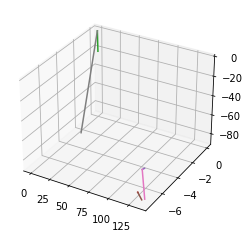

In [86]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

for i in range(tracks):
  x = [tracks_start[i][0], tracks_stop[i][0]]
  y = [tracks_start[i][1], tracks_stop[i][1]]
  z = [tracks_start[i][2], tracks_stop[i][2]]
  
  ax.plot(x, y, z)


In [87]:
event_list = [20, 34, 45, 67, 146,200]

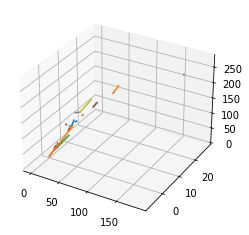

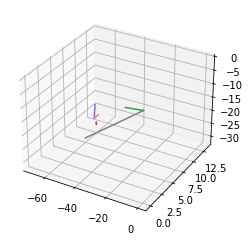

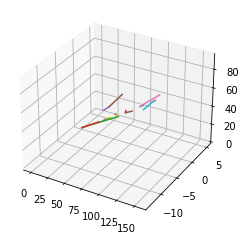

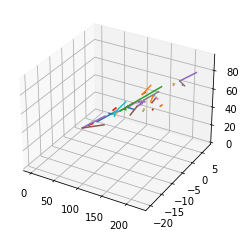

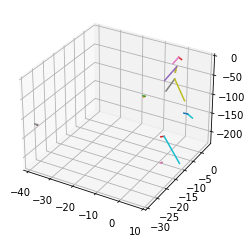

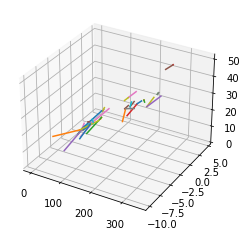

In [88]:
for id in event_list:
    tracks_start = data['track_start_position'][id]
    tracks_stop = data['track_stop_position'][id]
    tracks_start_time = data['track_start_time'][id]
    tracks = len(tracks_start)   
    
    fig = plt.figure()
    #ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')

    for i in range(tracks):
        x = [tracks_start[i][0], tracks_stop[i][0]]
        y = [tracks_start[i][1], tracks_stop[i][1]]
        z = [tracks_start[i][2], tracks_stop[i][2]]
  
        ax.plot(x, y, z)

## Visualizacion PMT

Esta es la visualización más interesante, en ella podemos ver los anillos generados por la radiación Cherenkov captados por los PMTs.

A lo largo del proyecto estos datos se utilizan para clasificar el tipo de partícula e incluso hacer regresiones para reconstruir el evento.

### Geometría del tanque

Primero cargamos las geometrías que nos permiten conocer las posiciones de los PMT.

In [89]:
# Se tienen eventos con hasta 19036 mpmt

## tanque base SK:geo.npz
#geo = np.load('/shared/home/HK_Mx/data/geometries/SK_geo.npz', allow_pickle=True)
#  APlica  ['tube_no', 'position', 'orientation']
# geo['position'].shape
#(10994, 3)


#geo = np.load('/shared/home/HK_Mx/data/geometries/IWCD_mPMT_image_positions.npz', allow_pickle=True)
# NO APlica
#['mpmt_image_positions']
#geo['mpmt_image_positions'].shape   (832, 2)

#geo = np.load('/shared/home/HK_Mx/data/geometries/geometry_grid.npz', allow_pickle=True)
# NO APlica
# geo['geometry'].shape     (16, 40, 19, 6)

#geo = np.load('/shared/home/HK_Mx/data/geometries/geometry_mPMT.npz', allow_pickle=True)
# NO APlica
# geo['geometry'].shape     (16, 40, 19, 6)

#geo = np.load('/shared/home/HK_Mx/data/geometries/geo_mPMTshort.npz', allow_pickle=True)
#  APlica  ['tube_no', 'position', 'orientation']
# geo['position'].shape
#(10184, 3)
 

geo = np.load('/home/cads/Documentos/HK_Mx/data/geometries/mPMT_full_geo.npz', allow_pickle=True)
#  APlica  ['tube_no', 'position', 'orientation']
# geo['position'].shape
#(15808, 3)    




In [90]:
geo['orientation'][0,:]

array([-0.79905665, -0.58778524, -0.12655814])

In [91]:
geo['position'][10993]

array([-357.04174805, -475.31552124,   94.62796783])

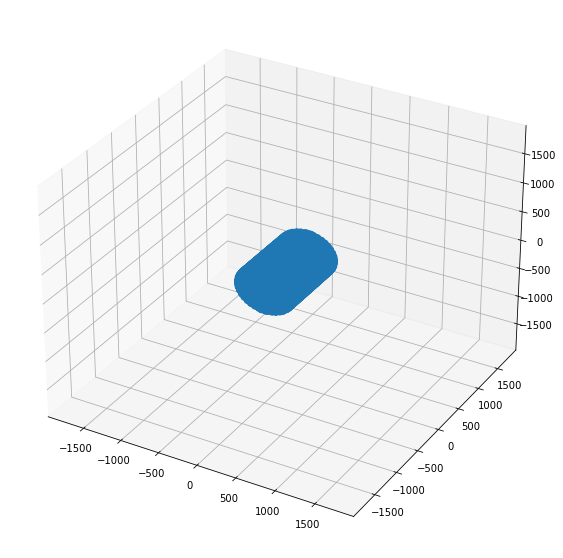

In [93]:
# Visualización del tanque

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim((-1900, 1900))
ax.set_xlim((-1900, 1900))
ax.set_ylim((-1900, 1900))

ax.scatter3D(geo['position'][:,0], geo['position'][:,1], geo['position'][:,2])

plt.show()

### Creación del DataFrame

Ahora seleccionamos un evento, pasamos los IDs a posiciones en el espacio (x, y, z) con ayuda de el archivo que tiene la geometría del tanque.

In [94]:
# Se selecciona un evento al azar
id = 19
positions = []
pmts_list = []
hit_charge_list = []
hit_time_list = []



print(data['digi_hit_charge'][id][1])
print(data['digi_hit_charge'][id].shape)
# 19036
# Traducimos los id de pmt a sus posiciones
pmts = data['digi_hit_pmt'][id]
print('El Mpmt mayoir ID')
print(pmts.max())
print('pmts')
print(len(pmts))
#print(pmts)

# TODO: Verificar si el id empieza en 0, se asume que sí
#for pmt in pmts:
#  print('for pmt')  
#  print(pmt)      
#  positions.append(geo['position'][pmt])
i = 0
for pmt in pmts:
  #print('for pmt')  
  #print(geo['position'][pmt])  
  ## Quito todos los ID de pmt mayores a 15808

  #print('carga')
  #print(data['digi_hit_charge'][id])
  if pmt < 15808:
      positions.append(geo['position'][pmt])
      pmts_list.append(pmt)
      hit_charge_list.append(data['digi_hit_charge'][id][i])
      hit_time_list.append(data['digi_hit_time'][id][i])    
  i += 1 
  if i%250 == 0:
      print('valor de i:', i)
positions = np.array(positions)

pmts_list = np.array(pmts_list)
hit_charge_list = np.array(hit_charge_list)
hit_time_list = np.array(hit_time_list)


3.0748029
(3583,)
El Mpmt mayoir ID
19023
pmts
3583
valor de i: 250
valor de i: 500
valor de i: 750
valor de i: 1000
valor de i: 1250
valor de i: 1500
valor de i: 1750
valor de i: 2000
valor de i: 2250
valor de i: 2500
valor de i: 2750
valor de i: 3000
valor de i: 3250
valor de i: 3500


Se crea un dataframe de este evento

In [95]:
event = {
  'id': pmts_list,
  'x': positions[:,0],
  'y': positions[:,1],
  'z': positions[:,2],
  'charge': hit_charge_list,
  'hit_time': hit_time_list
}

#  'charge': data['digi_hit_charge'][id],
#  'hit_time': data['digi_hit_time'][id]


event = pd.DataFrame(event)

In [96]:
event

,id,x,y,z,charge,hit_time
0,3433,-362.420898,149.361267,-35.241955,1.571501,957.799988
1,3258,-70.244926,153.687500,360.903656,3.074803,958.500000
2,4955,-363.593109,39.389977,-27.840946,7.244807,954.500000
3,10828,35.241955,-465.388733,362.420898,1.750820,957.900024
4,3255,-86.500290,170.145493,358.329041,0.631958,958.400024
...,...,...,...,...,...,...
3338,4798,-127.940781,22.508507,347.208618,2.525238,961.000000
3339,160,100.577843,407.816498,356.099396,1.912287,976.900024
3340,2488,-27.626566,215.162506,362.239563,1.468159,990.400024
3341,1287,-132.158218,342.438751,-340.596130,1.677594,969.400024


## Análisis exploratorio de los datos

Aquí se muestran visualizaciones interesantes del evento seleccionado.

### Corriente recibida por PMT

In [97]:
#!pip install matplotlib -U 

In [98]:
xx = event['charge'].to_numpy()

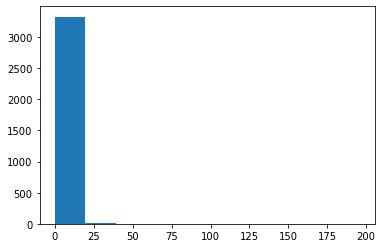

In [99]:
plt.hist(xx)
plt.show()

In [100]:
xx

array([1.571501 , 3.0748029, 7.2448072, ..., 1.4681591, 1.6775941,
       0.8343159], dtype=float32)

In [101]:
#pip install seaborn -U

In [102]:
#import seaborn as sns

In [103]:
event['charge']

0       1.571501
1       3.074803
2       7.244807
3       1.750820
4       0.631958
          ...   
3338    2.525238
3339    1.912287
3340    1.468159
3341    1.677594
3342    0.834316
Name: charge, Length: 3343, dtype: float32

<AxesSubplot:xlabel='charge', ylabel='Count'>

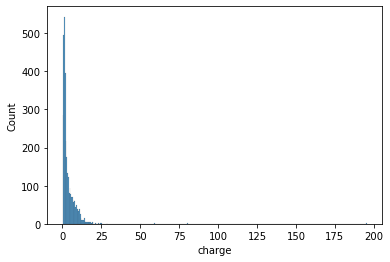

In [104]:
sns.histplot(event['charge'])
#sns.histplot(event['charge']).set_title('Corriente recibida por PMT')


In [105]:
import seaborn as sns

### Momento en que se activaron los PMTs

Text(0.5, 1.0, 'Momento en que se activaron los PMTs')

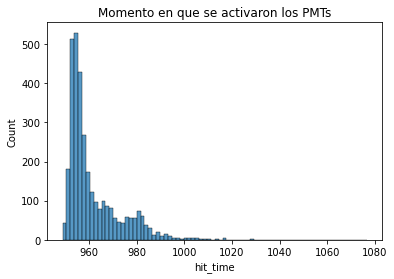

In [106]:
# Se ve raro, deberíamos borrar las colas
sns.histplot(event['hit_time']).set_title('Momento en que se activaron los PMTs')

In [107]:
# Quitamos outliers
event = event[(event['hit_time'] < 1200) & (event['hit_time'] > 930)]

<AxesSubplot:xlabel='hit_time', ylabel='Count'>

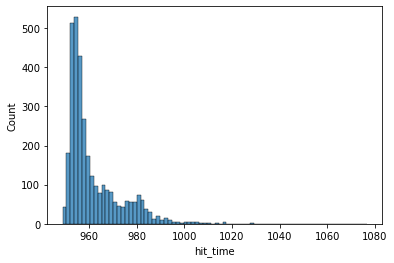

In [108]:
# Ahora sí se ve mejor
sns.histplot(event['hit_time'])

### Corriente detectada por los PMTs con respecto al tiempo

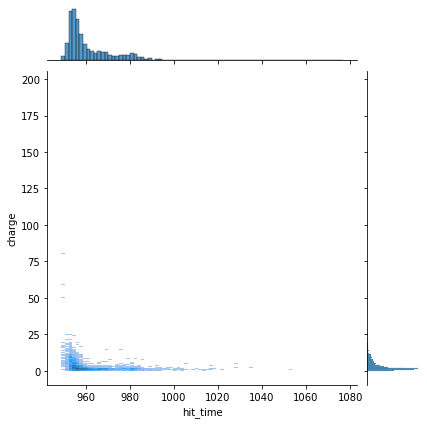

In [109]:
# Las primeras detecciones tienen hasta 10x más energía
sns.jointplot(data=event, x='hit_time', y='charge', kind='hist')

### PMTs activados en el evento

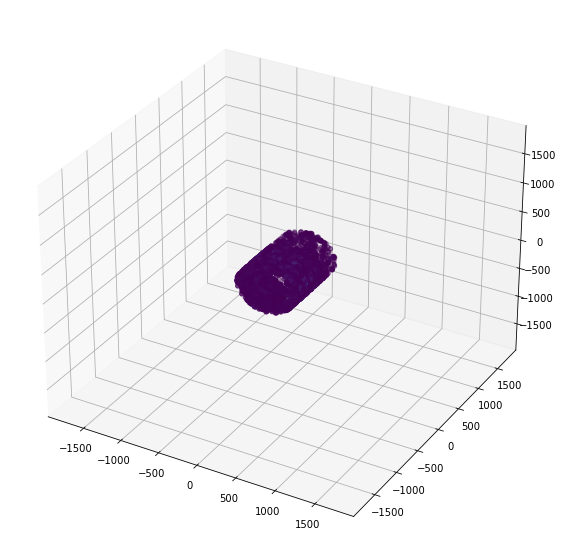

In [110]:
# PMTs activados con respecto a su corriente

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim((-1900, 1900))
ax.set_xlim((-1900, 1900))
ax.set_ylim((-1900, 1900))

ax.scatter3D(event['x'], event['y'], event['z'], c=event['charge'])

plt.show()

In [111]:
# Todos los hits con respecto al tiempo
fig = px.scatter_3d(event, x='x', y='y', z='z',
              color='charge', width=800, height=800, opacity=.8, size='charge', color_continuous_scale='Viridis')
fig.show()

In [112]:
# Hits de alta energia, al parecer los de alta energía son aquellos que forman el anillo
event_he = event[event['charge'] > 3]
fig = px.scatter_3d(event_he, x='x', y='y', z='z',
              color='charge', width=800, height=800, opacity=.8, size='charge', color_continuous_scale='Viridis')
fig.show()

### Animaciones de fromación del anillo

Estas animaciones se guardan como archivo .mp4 que puede verse en Colab en la parte izquierda donde está el símbolo de carpeta.

Primero se preparan los datos para que la animación se vea bien.

In [113]:
# Pasar tiempo a entero para quitar decimal ya que la animación toma cada tiempo como un frame.
# De lo contrario habría demasiados frames.
event = event.astype({'hit_time': int})

**Incremental**: La animación muestra los PMTs activados y se quedan dibujados hasta el final.

  0%|          | 0/120 [00:00<?, ?it/s]

MovieWriter stderr:
Unknown encoder 'libx264'



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x720', '-pix_fmt', 'rgba', '-r', '60', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-vcodec', 'libx264', '-y', 'neutrino_animation_incremental.mp4']' returned non-zero exit status 1.

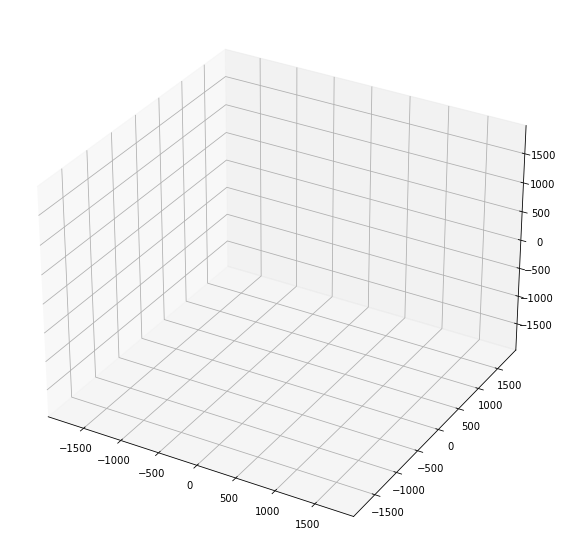

In [114]:
# Incremental

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim((-1900, 1900))
ax.set_xlim((-1900, 1900))
ax.set_ylim((-1900, 1900))


def init():
  episode=event[event['hit_time']==940]
  return ax.scatter3D(episode['x'], episode['y'], episode['z'], c=episode['charge']),

def animate(i):
  episode=event[event['hit_time']==i]
  return ax.scatter3D(episode['x'], episode['y'], episode['z'], c=episode['charge']),

ani = animation.FuncAnimation(fig, animate, frames=tqdm(range(930,1050)), interval=20, init_func=init)

ani.save('neutrino_animation_incremental.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

print('Video generado')

**No incremental**: La animación muestra en cada frame solo los PMTs que se activaron en ese momento.

In [ ]:
# No incremental

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim((-1900, 1900))
ax.set_xlim((-1900, 1900))
ax.set_ylim((-1900, 1900))

def init():
  episode=event[event['hit_time']==940]
  return ax.scatter3D(episode['x'], episode['y'], episode['z']),

def animate(i):
  ax.clear()
  ax.set_zlim((-1900, 1900))
  ax.set_xlim((-1900, 1900))
  ax.set_ylim((-1900, 1900))
  episode=event[event['hit_time']==i]
  return ax.scatter3D(episode['x'], episode['y'], episode['z'], c=episode['charge']),

ani = animation.FuncAnimation(fig, animate, frames=tqdm(range(930,1050)), interval=10, init_func=init, blit=True)

ani.save('neutrino_animation_no_incremental.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

print('Video generado')

## Cilindro desenrollado

El cilindro debe ser pasado a un plano para poder correr algoritmos de machine learning en ellos.

Aquí se intenta hacer esa proyección. Aunque no es la correcta.

In [ ]:
phi = np.arctan2(event['z'], event['x'])

plt.figure(figsize=(22,8))
ax = plt.axes()
ax.set(facecolor='#3c0852')

plt.scatter(phi, event['y'], c=event['charge'], s=25)

En este siguiente método se convierte cada PMT a un pixel de una imagen.

#### Desenrollar solo el barril

Pasar coordenadas cartesianas a cilíndricas y ordenarlos por z, theta.

In [ ]:
print('IDs: ')
print(geo['tube_no'].shape)

print('Posiciones: ')
print(geo['position'].shape)

In [ ]:
def to_cylindrical(coords):
  x, y, z = coords[0], coords[1], coords[2]
  ro = math.sqrt(x**2 + y**2)
  theta = np.arctan2(y, x)
  return  ro, theta, z

In [ ]:
# Test con un pmt
x, y, z = geo['position'][0][0], geo['position'][0][1], geo['position'][2]
ro, theta, z = to_cylindrical(geo['position'][0])

# Funciona!
print(x, y, z)
print(ro,theta,z)

In [ ]:
cyl_coords = np.array([to_cylindrical(coords) for coords in geo['position']])

pmt_pos = {
    'id': geo['tube_no'],
    'ro': cyl_coords[:, 0],
    'theta': cyl_coords[:, 1],
    'x': geo['position'][:,0],
    'y': geo['position'][:,1],
    'z': geo['position'][:,2],
}

pmt_pos = pd.DataFrame(pmt_pos)

In [ ]:
pmt_pos

In [ ]:
# Si theta se distribuye uniformemente, está correcto
sns.histplot(pmt_pos['theta'])

In [ ]:
sns.histplot(pmt_pos['ro'])

In [ ]:
fig = px.scatter_3d(data_frame=pmt_pos, x='x', y='y', z='z', color='theta', width=700, height=700, opacity=1)
fig.show()

Ahora ordenamos las coordenadas por theta


In [ ]:
pmt_pos = pmt_pos.sort_values(by=['z', 'theta'])


In [ ]:
# Las tapas están por encima de abs(z) > 1750, las debemos quitar
plt.hist(abs(pmt_pos['z']), bins=30)

pmt_no_caps = pmt_pos[abs(pmt_pos['z']) < 1750]

In [ ]:
# Aquí se debería ver el cilindro sin tapas donde el color es z
plt.scatter(pmt_no_caps['theta'], pmt_no_caps['z'], c=pmt_no_caps['z'])

In [ ]:
# Creación de matriz que tiene los id en posicion
# Se recorre el dataframe ordenado por z y new_theta y cuando cambie z, se agrega un renglón
image = [[ int(pmt_no_caps.iloc[0]['id']) ]]
current_row = 0
last_z = pmt_no_caps.iloc[0]['z']

for i in range(1, len(pmt_no_caps)):
  pmt = pmt_no_caps.iloc[i]
  if abs(last_z - pmt['z']) > 0.001 :
    image.append([])
    current_row += 1
  last_z = pmt['z']

  image[current_row].append(int(pmt['id']))

In [ ]:
image = np.array(image)
image.shape

In [ ]:
# Así están distribuidos los ids
# Al parecer hay un error a la derecha con unos pmts, ver tanque y solucionar.
plt.imshow(image)

In [ ]:
# Guardar la posicion de cada pmt
np.save('sk-pmtpos.npy', image)

#### Ahora pasemos el anillo a este formato

Ya tenemos la matriz imagen, sigue pasar los pmts activados

In [ ]:
# Dos canales: corriente y tiempo en el que se activó
ring_image = np.zeros((51, 150, 2))
for row in range(len(image)):
  for col in range(len(image[row])):
    pmt = event[event['id'] == int(image[row][col])]

    if not pmt.empty:
      charge = pmt['charge'].iloc[0]
      hit_time = pmt['hit_time'].iloc[0]
      ring_image[row][col] = np.array([charge, hit_time])

In [ ]:
plt.imshow(ring_image[:, :, 0])

## TODO:

- Pasar el desenrollador a un script para automatizar cuando sean muchas imágenes
- Correr una CNN básica para e-/gamma con SuperK, todos los valores fijos, 100 eventos de cada uno.

## Referencias

https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

https://plotly.com/python/3d-scatter-plots/
